In [115]:
import pandas as pd
dropout = pd.read_csv('/Dropout/dropout2_finall.csv', index_col=0)

### 이상치 판별 방법
1) zscore이용

In [117]:
# zscore
mean = dropout['GDP'].mean()
std = dropout['GDP'].std()

In [118]:
zscore = (dropout['GDP'] - mean) / std # 1.96

In [119]:
#dropout 조건문
dropout[abs((dropout['GDP']-mean)/std)<1.96]

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,Portuguese,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,Portuguese,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,Portuguese,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,Portuguese,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,Portuguese,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,e7592d77-b53d-4496-a276-0fb6afdd7265,Portuguese,Male,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4395,e76231d5-8450-4424-b344-daac4b02845b,Russian,Female,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4396,e77542f6-e166-46a6-ba62-903e0740631e,Portuguese,Female,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4397,e7d809db-983c-4db5-b32a-64698a39a5aa,Portuguese,Female,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


### 이상치 판별 방법
2) IQR이용

In [121]:
# IQR
GDP = dropout['GDP']

q1 = GDP.quantile(0.25)
q2 = GDP.quantile(0.5)
q3 = GDP.quantile(0.75)
q4 = GDP.quantile(0.1)

In [122]:
IQR = q3 - q1

In [123]:
#최대 / 최소
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

In [124]:
#최대, 최소 사이 값만 가져오기
# dropout[() & ()]

dropout[(dropout['GDP']>=lower)& (dropout['GDP']<=upper)]

dropout[dropout['GDP'].between(lower, upper)] # 위와 같은 결과. between 사용

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,Portuguese,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,Portuguese,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,Portuguese,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,Portuguese,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,Portuguese,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,e7592d77-b53d-4496-a276-0fb6afdd7265,Portuguese,Male,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4395,e76231d5-8450-4424-b344-daac4b02845b,Russian,Female,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4396,e77542f6-e166-46a6-ba62-903e0740631e,Portuguese,Female,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4397,e7d809db-983c-4db5-b32a-64698a39a5aa,Portuguese,Female,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [125]:
# isolation forest => 이상치 판별에 사용됨. 

In [126]:
# one-hot encoding -> 순서가 없는 문자형 데이터일 경우 사용. 해당 되는 것 1, 해당 안되면 0으로 값을 넣어서 열들을 새로 만듦.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [127]:
encoder = OneHotEncoder()

encoder = encoder.fit(dropout['Nationality'].values.reshape(-1,1)) # fit -> 학습시키기.
 # reshape -> 형태 바꾸기.(-1,1)=열고정. 고정된 열에 따라 맞추도록 함.

In [139]:
nations = encoder.transform(dropout['Nationality'].values.reshape(-1,1))

In [140]:
nations = nations.toarray()

In [132]:
print(encoder.categories_[0])

['Angolan' 'Brazilian' 'Cape Verdean' 'Colombian' 'Cuban' 'Dutch'
 'English' 'German' 'Guinean' 'Italian' 'Lithuanian' 'Mexican' 'Moldova'
 'Mozambican' 'Portuguese' 'Romanian' 'Russian' 'Santomean' 'Spanish'
 'Turkish' 'Ukrainian']


In [137]:
for idx, col in enumerate(encoder.categories_[0]):
    print(idx, col)

0 Angolan
1 Brazilian
2 Cape Verdean
3 Colombian
4 Cuban
5 Dutch
6 English
7 German
8 Guinean
9 Italian
10 Lithuanian
11 Mexican
12 Moldova
13 Mozambican
14 Portuguese
15 Romanian
16 Russian
17 Santomean
18 Spanish
19 Turkish
20 Ukrainian


In [133]:
['nation_' + col for col in encoder.categories_[0]]

['nation_Angolan',
 'nation_Brazilian',
 'nation_Cape Verdean',
 'nation_Colombian',
 'nation_Cuban',
 'nation_Dutch',
 'nation_English',
 'nation_German',
 'nation_Guinean',
 'nation_Italian',
 'nation_Lithuanian',
 'nation_Mexican',
 'nation_Moldova',
 'nation_Mozambican',
 'nation_Portuguese',
 'nation_Romanian',
 'nation_Russian',
 'nation_Santomean',
 'nation_Spanish',
 'nation_Turkish',
 'nation_Ukrainian']

In [141]:
nations = pd.DataFrame(nations, columns=['nation_' + col for col in encoder.categories_[0]])

In [142]:
nations

,nation_Angolan,nation_Brazilian,nation_Cape Verdean,nation_Colombian,nation_Cuban,nation_Dutch,nation_English,nation_German,nation_Guinean,nation_Italian,...,nation_Mexican,nation_Moldova,nation_Mozambican,nation_Portuguese,nation_Romanian,nation_Russian,nation_Santomean,nation_Spanish,nation_Turkish,nation_Ukrainian
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
dropout

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,Portuguese,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,Portuguese,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,Portuguese,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,Portuguese,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,Portuguese,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,e7592d77-b53d-4496-a276-0fb6afdd7265,Portuguese,Male,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4395,e76231d5-8450-4424-b344-daac4b02845b,Russian,Female,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4396,e77542f6-e166-46a6-ba62-903e0740631e,Portuguese,Female,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4397,e7d809db-983c-4db5-b32a-64698a39a5aa,Portuguese,Female,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [19]:
# 데이터 스케일링: 수치형에만 해당!!
 # min-max --> 최대1, 최소0으로 지정
 # 표준화 --> 최대, 최소의 지정X으로 상한, 하한X

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [58]:
scaler = MinMaxScaler()

minmax = scaler.fit(dropout['Inflation rate'].values.reshape(-1,1))

dropout['Inflation rate_re'] = minmax.transform(dropout['Inflation rate'].values.reshape(-1,1))

In [59]:
scaler = StandardScaler()

minmax = scaler.fit(dropout['Inflation rate'].values.reshape(-1,1))

dropout['Inflation rate_re'] = minmax.transform(dropout['Inflation rate'].values.reshape(-1,1))

In [60]:
dropout.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Inflation rate_re
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,...,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4.397000e+03
mean,1.179213,6.877416,1.722993,9.897657,0.890835,2.525813,12.258131,16.462361,7.324312,7.820787,...,0.541051,6.236152,8.063825,4.450788,10.244865,0.149875,11.562689,1.227963,0.007357,5.979095e-17
std,0.607202,5.300586,1.310228,4.331990,0.311882,3.955862,9.036827,11.050910,4.005670,4.860071,...,1.920262,2.193928,3.937239,3.008410,5.189189,0.754156,2.652739,1.377634,2.259824,1.000114e+00
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,-1.472230e+00
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,-6.736686e-01
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.248925e-01
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,9.960501e-01
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,29.000000,34.000000,32.000000,46.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.794611e+00


In [61]:
# make_column_transformer -> 타입별 일괄처리하는 패키지
# fit_transform() -> 학습함과 동시에 적용
# test 데이터셋에는 target X

In [62]:
# 데이터 샘플링
 # 1) over -> 비율이 낮은 범주를 비율 높은 만큼 채움. 2) under -> 비율 낮은 범주 기준으로 비율 높은 범주 지움.(지양)
  # --> 기존 데이터 그대로/반복하여 추가하는 형태
 # 1-1) SMOTE -> 새로운 데이터 추가하는 형태 / 수치형!(범주형은 SMOTE-NC)

In [63]:
dropout.dtypes

ID                                                 object
Nationality                                        object
Gender                                             object
Target                                             object
Marital status                                    float64
Application mode                                  float64
Application order                                 float64
Course                                            float64
Daytime/evening attendance                        float64
Previous qualification                            float64
Mother's qualification                            float64
Father's qualification                            float64
Mother's occupation                               float64
Father's occupation                               float64
Displaced                                         float64
Educational special needs                         float64
Debtor                                            float64
Tuition fees u

In [64]:
dropout

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Inflation rate_re
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,Portuguese,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0.124892
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,Portuguese,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,-1.109247
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,Portuguese,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0.124892
3,37fafa03-d77a-4723-89aa-84a8277379c5,Portuguese,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,-1.472230
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,Portuguese,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,-1.109247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,e7592d77-b53d-4496-a276-0fb6afdd7265,Portuguese,Male,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06,1.141243
4395,e76231d5-8450-4424-b344-daac4b02845b,Russian,Female,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02,-0.455879
4396,e77542f6-e166-46a6-ba62-903e0740631e,Portuguese,Female,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79,-1.109247
4397,e7d809db-983c-4db5-b32a-64698a39a5aa,Portuguese,Female,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12,-1.472230


In [65]:
# 컬럼을 값으로 변화
def change_value(values):
    if values == 'Portuguese':
        return 1
    elif values == 'German':
        return 2
    elif values == 'Spanish':
        return 3
    elif values == 'Italian':
        return 4
    elif values == 'Dutch':
        return 5
    elif values == 'English':
        return 6
    elif values == 'Lithuanian':
        return 7
    elif values == 'Angolan':
        return 8
    elif values == 'Cape Verdean':
        return 9
    elif values == 'Guinean':
        return 10
    elif values == 'Mozambican':
        return 11
    elif values == 'Santomean':
        return 12
    elif values == 'Turkish':
        return 13
    elif values == 'Brazilian':
        return 14
    elif values == 'Romanian':
        return 15
    elif values == 'Moldova':
        return 16
    elif values == 'Mexican':
        return 17
    elif values == 'Ukrainian':
        return 18
    elif values == 'Russian':
        return 19
    elif values == 'Cuban':
        return 20
    elif values == 'Colombian':
        return 21

In [66]:
dropout['Nationality'] = dropout['Nationality'].apply(change_value)

In [67]:
def change_value(values):
    if values == 'Male':
        return 1
    elif values == 'Female':
        return 2

In [68]:
dropout['Gender'] = dropout['Gender'].apply(change_value)

In [69]:
def change_value(values):
    if values == 'Graduate':
        return 1
    elif values == 'Dropout' :
        return 2
    elif values == 'Enrolled' :
        return 3

In [70]:
dropout['Target'] = dropout['Target'].apply(change_value)

In [71]:
ID = dropout[['ID']]
x=dropout.drop(columns={'ID', 'Target'}) # =input
y=dropout[['Target']] # =target

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=777) #(input, target, 비율, 랜덤샘플링 여부, 랜덤추첨=임의 수)

In [73]:
y_test

,Target
482,2
600,2
1724,1
327,3
93,2
...,...
4320,2
1262,1
1138,1
2395,1


In [75]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [76]:
ros = RandomOverSampler()
dropout['Target'].value_counts()

Target
1    2201
2    1405
3     791
Name: count, dtype: int64

In [77]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [93]:
DT = tree.DecisionTreeClassifier()

RF = RandomForestClassifier()

In [94]:
RF.fit(X_ros, y_ros) # 모델 학습(기출 문제)

C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [95]:
# 모델 학습(실제수능문제)
y_pred=RF.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

In [83]:
# 예측값: y_pred
# 실제값: y_test

In [84]:
# average 옵션
 # micro : 전체 평균,
 # macro : 라벨 별 각 합의 평균
 # None : 각 라벨 별 평균

In [97]:
# accuract_score(실제값, 예측값)
print(accuracy_score(y_test, y_pred))

print(precision_score(y_test, y_pred, average='macro'))

print(recall_score(y_test, y_pred, average='macro'))


0.7636363636363637
0.7125481060622579
0.6898633092914


In [98]:
report = classification_report(y_test, y_pred)

In [99]:
print(report)

              precision    recall  f1-score   support

           1       0.79      0.90      0.84       638
           2       0.82      0.75      0.78       451
           3       0.52      0.42      0.47       231

    accuracy                           0.76      1320
   macro avg       0.71      0.69      0.70      1320
weighted avg       0.76      0.76      0.76      1320



In [100]:
RF.predict_proba(X_test)

array([[0.12, 0.4 , 0.48],
       [0.01, 0.81, 0.18],
       [0.89, 0.03, 0.08],
       ...,
       [0.76, 0.02, 0.22],
       [0.3 , 0.53, 0.17],
       [0.63, 0.14, 0.23]])

In [102]:
y_score = RF.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=2)

In [103]:
roc = auc(fpr, tpr)

In [92]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.set(font_scale=1.4)
# 맑은 고딕으로 글꼴 설정하기
plt.rc('font', family='Malgun Gothic') 
# 마이너스 기호 문제 해결하기
mpl.rcParams['axes.unicode_minus'] = False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


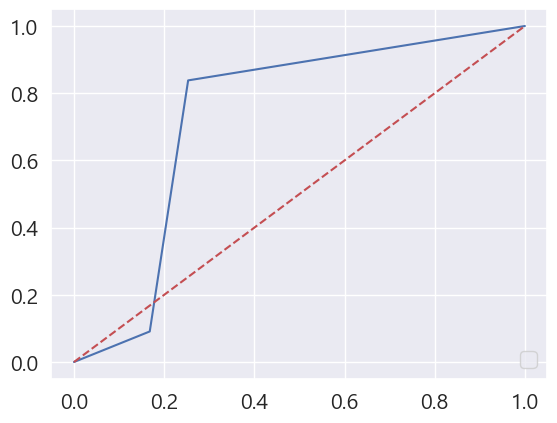

In [105]:
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')